In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("World_Billionaire_2024.csv")
df.describe()

,RANK,NET_WORTH
count,2742.000000,2742.000000
mean,1371.401167,5.248395
std,791.676059,12.926505
min,1.000000,0.400000
25%,686.250000,1.500000
50%,1371.000000,2.400000
75%,2056.750000,4.675000
max,2742.000000,212.300000


In [3]:
df.columns

Index(['RANK', 'COMPANY', 'EXECUTIVE_NAME', 'NET_WORTH', 'COUNTRY'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RANK            2742 non-null   int64  
 1   COMPANY         2739 non-null   object 
 2   EXECUTIVE_NAME  2742 non-null   object 
 3   NET_WORTH       2742 non-null   float64
 4   COUNTRY         2742 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 107.2+ KB


In [5]:
df["COUNTRY"]

0       United States
1       United States
2              France
3       United States
4       United States
            ...      
2737            China
2738            China
2739            China
2740            China
2741    United States
Name: COUNTRY, Length: 2742, dtype: object

In [6]:
ex_cnt_gp=df.groupby("COUNTRY")["EXECUTIVE_NAME"].agg(["count"])
ex_cnt_gp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, Algeria to Zimbabwe
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   78 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB


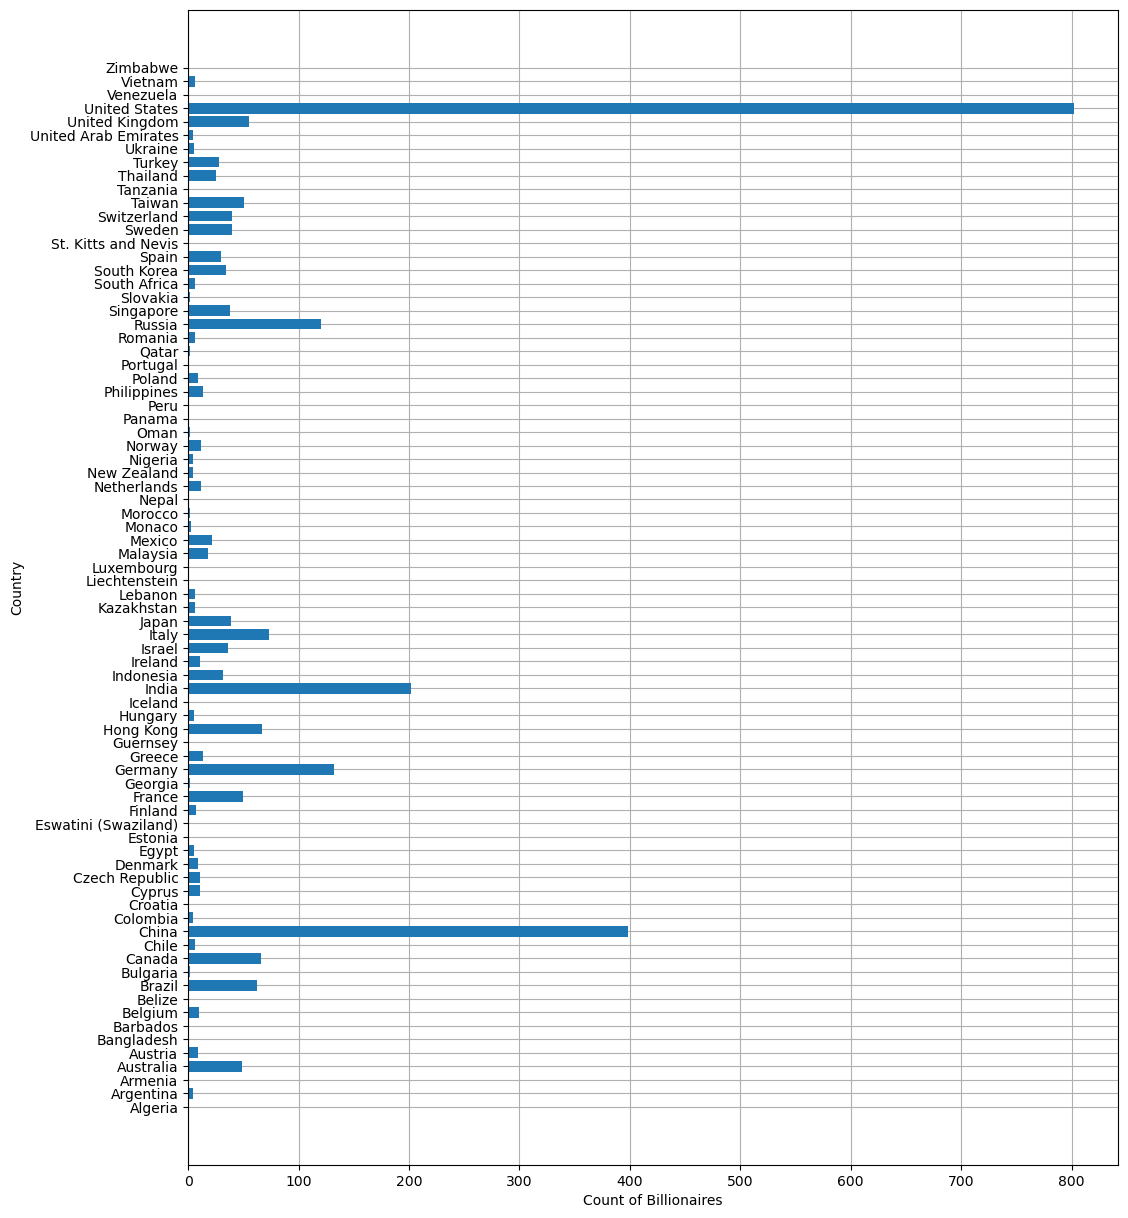

In [7]:
plt.figure(figsize=(12,15))
plt.barh(ex_cnt_gp.index,ex_cnt_gp["count"],zorder=2)
plt.xlabel("Count of Billionaires")
plt.ylabel("Country")
plt.grid()
plt.show()

In [8]:
type(ex_cnt_gp)

pandas.core.frame.DataFrame

In [9]:
ex_cnt_gp.loc["United States","count"]

802

In [10]:
ex_cnt_gp["count"]

COUNTRY
Algeria             1
Argentina           4
Armenia             1
Australia          49
Austria             9
                 ... 
United Kingdom     55
United States     802
Venezuela           1
Vietnam             6
Zimbabwe            1
Name: count, Length: 78, dtype: int64

In [11]:
c_count= {} 
if(ex_cnt_gp["count"]>800).any():
    c_count[">800"]=(ex_cnt_gp.loc[ex_cnt_gp["count"]>800,"count"]).count()
if((ex_cnt_gp["count"]>600) & (ex_cnt_gp["count"]<=800)).any():
    c_count["601<->800"]=(ex_cnt_gp.loc[(ex_cnt_gp["count"]>600) & (ex_cnt_gp["count"]<=800),"count"]).count()
if((ex_cnt_gp["count"]>400) & (ex_cnt_gp["count"]<=600)).any():
    c_count["401<->600"]=(ex_cnt_gp.loc[(ex_cnt_gp["count"]>400) & (ex_cnt_gp["count"]<=600),"count"]).count()
if((ex_cnt_gp["count"]>200) & (ex_cnt_gp["count"]<=400)).any():
    c_count["201<->400"]=(ex_cnt_gp.loc[(ex_cnt_gp["count"]>200) & (ex_cnt_gp["count"]<=400),"count"]).count()
if((ex_cnt_gp["count"]>100) & (ex_cnt_gp["count"]<=200)).any():
    c_count["101<->200"]=(ex_cnt_gp.loc[(ex_cnt_gp["count"]>100) & (ex_cnt_gp["count"]<=200),"count"]).count()
if((ex_cnt_gp["count"]>50) & (ex_cnt_gp["count"]<=100)).any():
    c_count["51<->100"]=(ex_cnt_gp.loc[(ex_cnt_gp["count"]>50) & (ex_cnt_gp["count"]<=100),"count"]).count()
if(ex_cnt_gp["count"]<=50).any():
    c_count["<=50"]=(ex_cnt_gp.loc[ex_cnt_gp["count"]<=50,"count"]).count()
print(c_count)

{'>800': 1, '201<->400': 2, '101<->200': 2, '51<->100': 6, '<=50': 67}


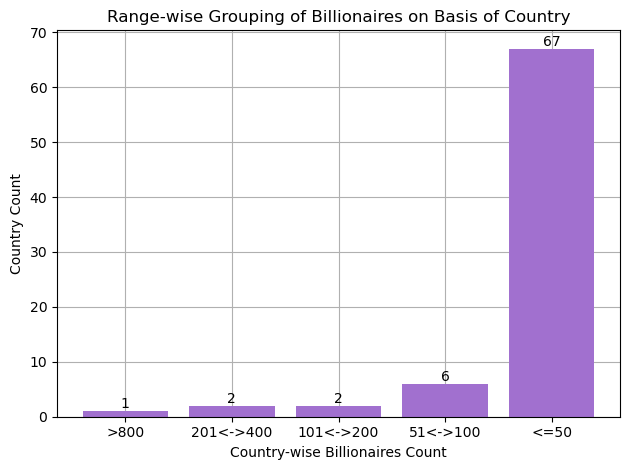

In [12]:
ranges_list=list(c_count.keys())
country_count=list(c_count.values())
plt.bar(ranges_list,country_count,zorder=2,color="#a170cf")
i=0
while i < (len(ranges_list)):
    plt.text(i,country_count[i]+0.5,str(country_count[i]),ha="center")
    i+=1
plt.xlabel("Country-wise Billionaires Count")
plt.ylabel("Country Count")
plt.title("Range-wise Grouping of Billionaires on Basis of Country")
plt.tight_layout()
plt.grid()
plt.show()

In [13]:
rel_anl_wrt=df.groupby("COUNTRY")["NET_WORTH"].agg(["min","mean","max"]).copy()
rel_anl_wrt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, Algeria to Zimbabwe
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   min     78 non-null     float64
 1   mean    78 non-null     float64
 2   max     78 non-null     float64
dtypes: float64(3)
memory usage: 2.4+ KB


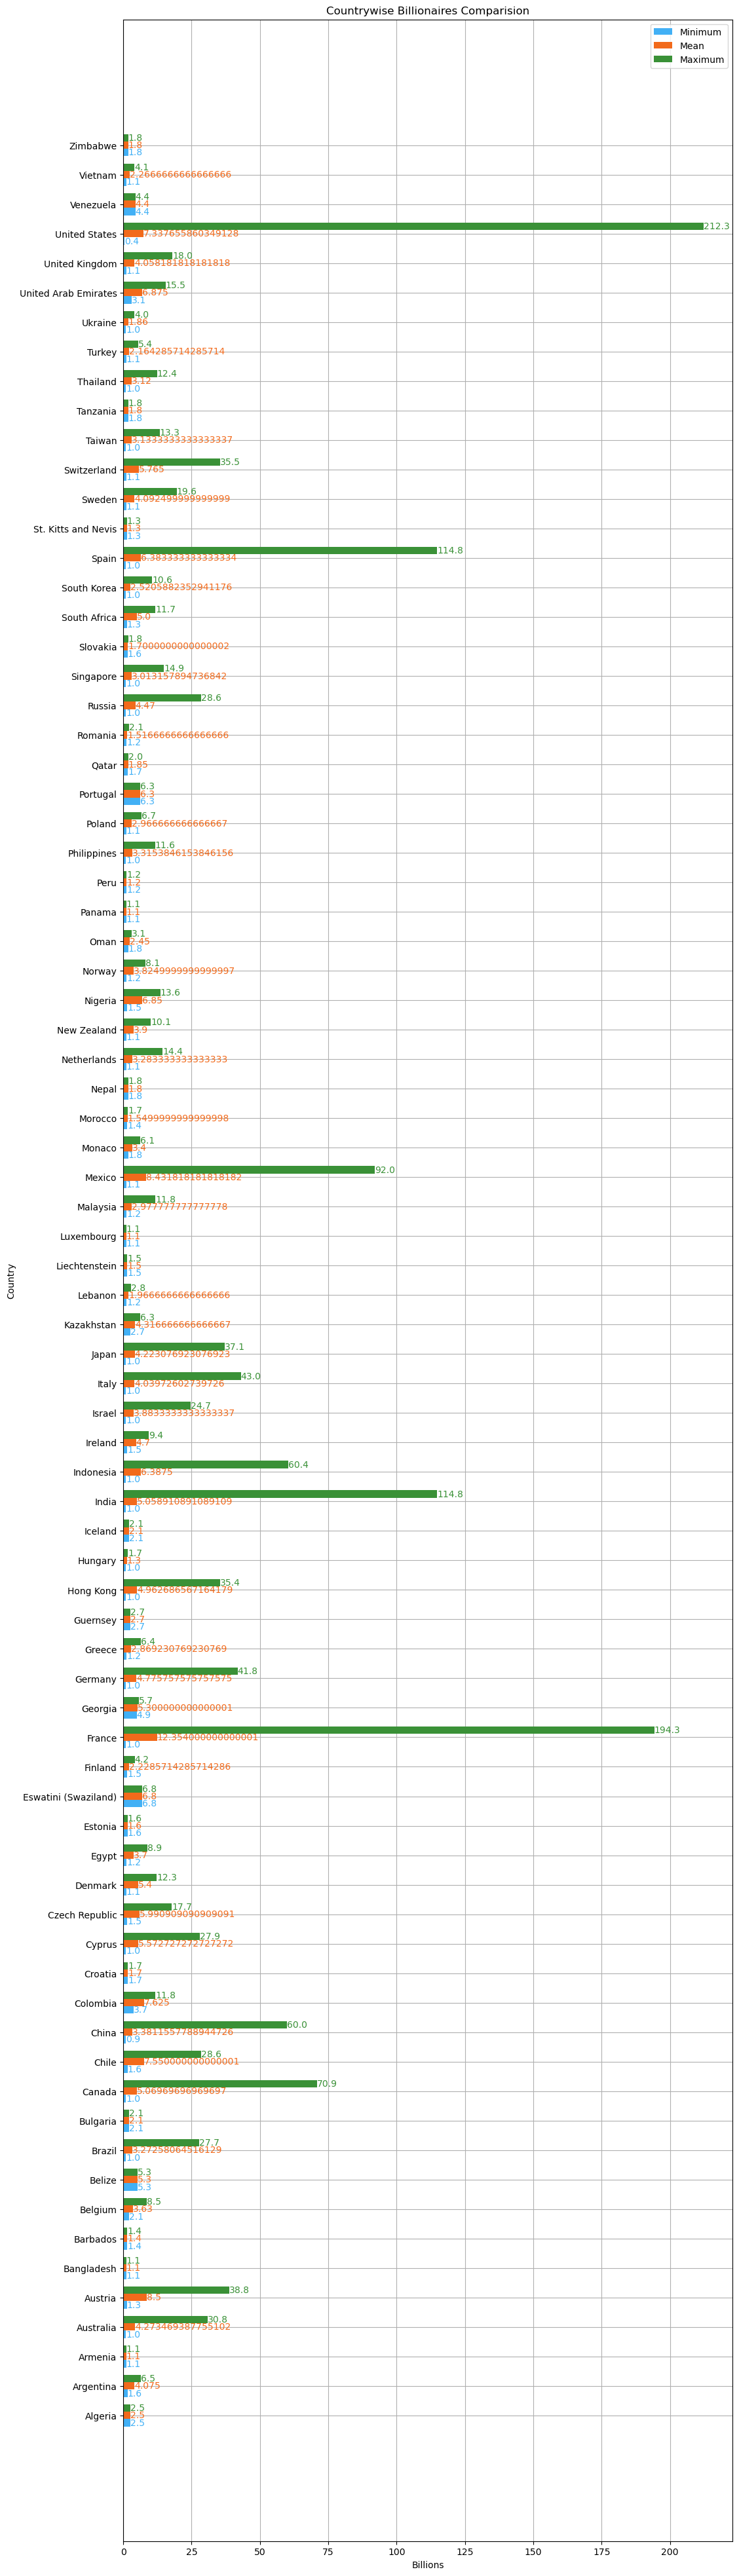

In [64]:
plt.figure(figsize=(12,50))
minm=np.array(rel_anl_wrt["min"])
means=np.array(rel_anl_wrt["mean"])
maxm=np.array(rel_anl_wrt["max"])
idx=np.arange(len(rel_anl_wrt.index))
width=0.25

plt.barh(idx-(width),minm,width,label="Minimum",zorder=2,color="#42b0f5")
i1=0
while i1 < (len(minm)):
    plt.text(minm[i1],idx[i1]-width,str(minm[i1]),ha="left",va="center",color="#42b0f5")
    i1+=1

plt.barh(idx,means,width,label="Mean",zorder=2,color="#f26a1b")
i2=0
while i2 < (len(means)):
    plt.text(means[i2],idx[i2],str(means[i2]),ha="left",va="center",color="#f26a1b")
    i2+=1
    
plt.barh(idx+(width),rel_anl_wrt["max"],width,label="Maximum",zorder=2,color="#3a9137")
i3=0
while i3 < (len(maxm)):
    plt.text(maxm[i3],idx[i3]+width,str(maxm[i3]),ha="left",va="center",color="#3a9137")
    i3+=1

plt.xlabel("Billions")
plt.ylabel("Country")
plt.title("Countrywise Billionaires Comparision")
plt.grid()
plt.legend()
plt.yticks(idx,rel_anl_wrt.index)
plt.show()

In [65]:
rel_anl_wrt["Max-Mean"]=(rel_anl_wrt["max"]-rel_anl_wrt["mean"])
rel_anl_wrt_sorted=rel_anl_wrt.sort_values(by="Max-Mean",ascending=True)
rel_anl_wrt_sorted["Rank"]=rel_anl_wrt_sorted["Max-Mean"].rank(ascending=True,method="dense")
rel_anl_wrt_sorted

,min,mean,max,Max-Mean,Rank
COUNTRY,,,,,
Algeria,2.5,2.500000,2.5,0.000000,1.0
Venezuela,4.4,4.400000,4.4,0.000000,1.0
Tanzania,1.8,1.800000,1.8,0.000000,1.0
St. Kitts and Nevis,1.3,1.300000,1.3,0.000000,1.0
Portugal,6.3,6.300000,6.3,0.000000,1.0
...,...,...,...,...,...
Mexico,1.1,8.431818,92.0,83.568182,54.0
Spain,1.0,6.383333,114.8,108.416667,55.0
India,1.0,5.058911,114.8,109.741089,56.0


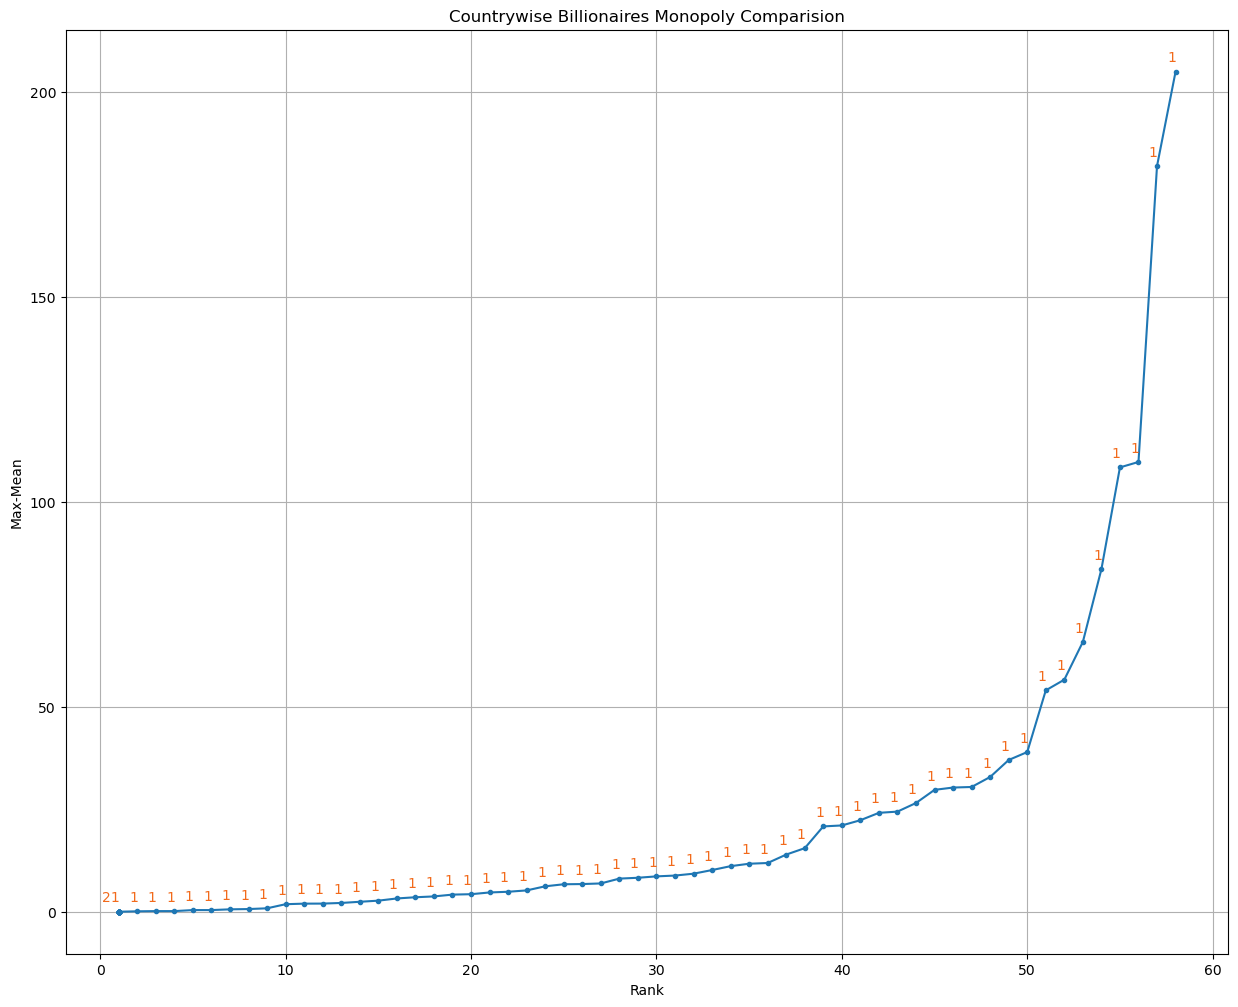

In [66]:
plt.figure(figsize=(15,12))
ax = plt.gca()
ax.plot(rel_anl_wrt_sorted["Rank"],rel_anl_wrt_sorted["Max-Mean"],marker=".",linestyle="-",zorder=2)
rank_cnt=rel_anl_wrt_sorted.groupby("Max-Mean")["Rank"].agg(["count"])

for index, row in rank_cnt.iterrows():
    ax.annotate(
        text=f"{row['count']}",
        xy=(rel_anl_wrt_sorted[rel_anl_wrt_sorted["Max-Mean"]==index]["Rank"].iloc[0], index),
        xytext=(0.5, 5),
        textcoords="offset points",
        ha="right",
        va="bottom",
        color="#f26a1b"
    )

plt.xlabel("Rank")
plt.ylabel("Max-Mean")
plt.title("Countrywise Billionaires Monopoly Comparision")
plt.grid()
plt.show()